# Polynomial Interpolation

In [64]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

In [65]:
ZERO = np.polynomial.polynomial.polyzero
def interpolate(points):
    if len(points) == 0:
        raise ValueError('Must provide atleast one point')
    x_values = [p[0] for p in points]
    if len(set(x_values)) < len(x_values):
        raise ValueError('points are not distinct')
    terms = [single_term(points, i) for i in range(0, len(points))]
    return sum(terms, ZERO)

In [75]:
def single_term(points, i):
    the_term = Polynomial([1.])
    xi, yi = points[i]

    for j, p in enumerate(points):
        if j==i:
            continue
        xj = p[0]
        the_term = the_term * Polynomial ([-xj / (xi - xj), 1.0 / (xi - xj)])
    return the_term * Polynomial([yi])

In [89]:
points1 = [(1,1)]
points2 = [(1,1),  (2,0)]
points3 = [(1,1),  (2,4), (7,9)]
points5 = [(float(x), float(y)) for x, y in zip(np.random.uniform(0, 10, 6), np.random.uniform(0, 10, 6))]

f1  = interpolate(points1)
f2 = interpolate(points2)
f3 = interpolate(points3)
f5 = interpolate(points5)

In [90]:
def plot_functions_side_by_side(functions, points_lists, titles=None, x_range=(0, 10), num_points=1000, figsize=(15, 5)):
    """
    Plot three functions side by side with specified points marked in red.
    
    Parameters:
    functions: List of callable functions to plot
    points_lists: List of arrays to plot points for each function
    titles: List of titles for each subplot
    x_range: Tuple of (min_x, max_x)
    num_points: Number of points to plot for the function
    figsize: Tuple of (width, height) for the figure
    """
    # Generate x values for function plotting
    x = np.linspace(x_range[0], x_range[1], num_points)
    
    # Create figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    # Default titles if none provided
    if titles is None:
        titles = [f'Function {i+1}' for i in range(len(functions))]
    
    # Plot each function and its points
    for ax, func, points, title in zip(axes, functions, points_lists, titles):
        # Plot the function
        y = func(x)
        ax.plot(x, y, '-', label='Function')
        
        # Plot the points
        y_points = func(points)  # Calculate y values using the function
        ax.scatter(points, y_points, color='red', s=50, zorder=5, label='Points')
        
        # Styling
        ax.grid(True)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(title)
        ax.legend()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

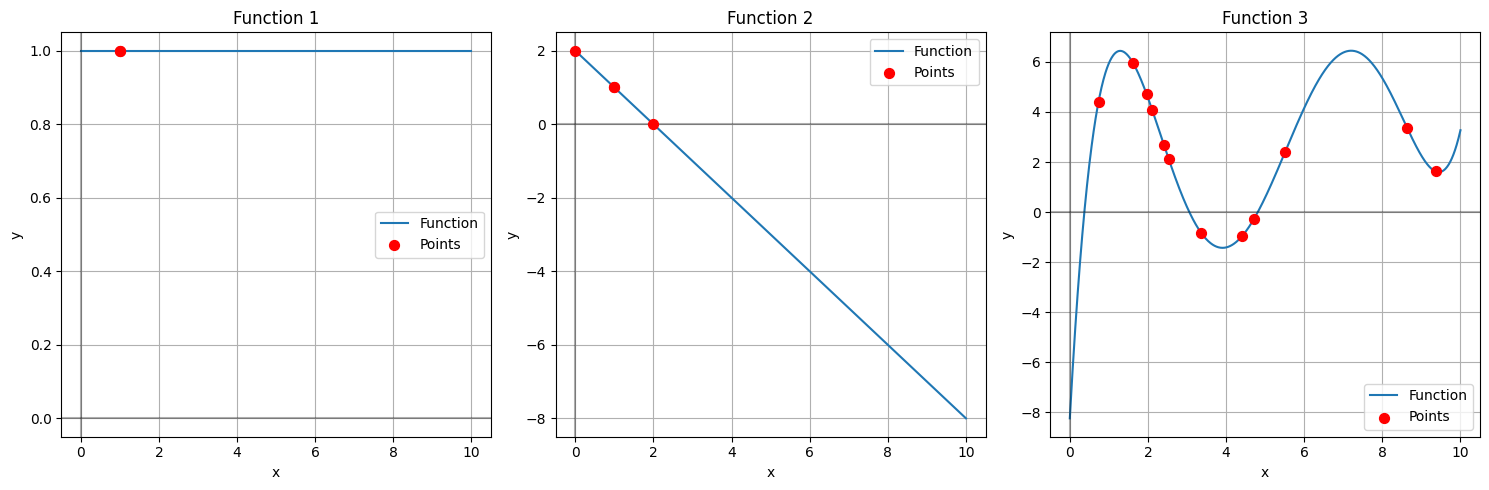

In [91]:
plot_functions_side_by_side([f1,f2, f5], [points1, points2, points5])